In [70]:
!pip install pandas openpyxl matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [71]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [72]:
df = pd.read_excel("./Online Retail.xlsx") 

In [73]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [74]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [75]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [76]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [77]:
df['hour'] = df['InvoiceDate'].dt.hour

df['weekday'] = df['InvoiceDate'].dt.weekday

df['month'] = df['InvoiceDate'].dt.month

df['week'] = df['InvoiceDate'].dt.isocalendar().week

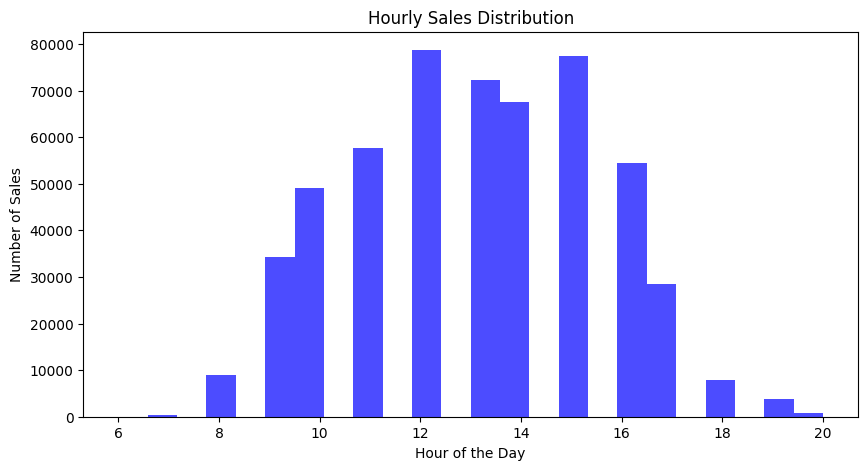

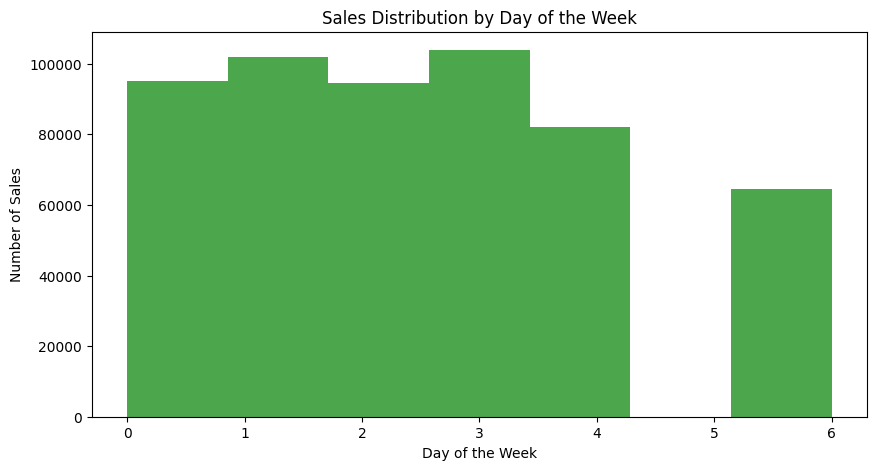

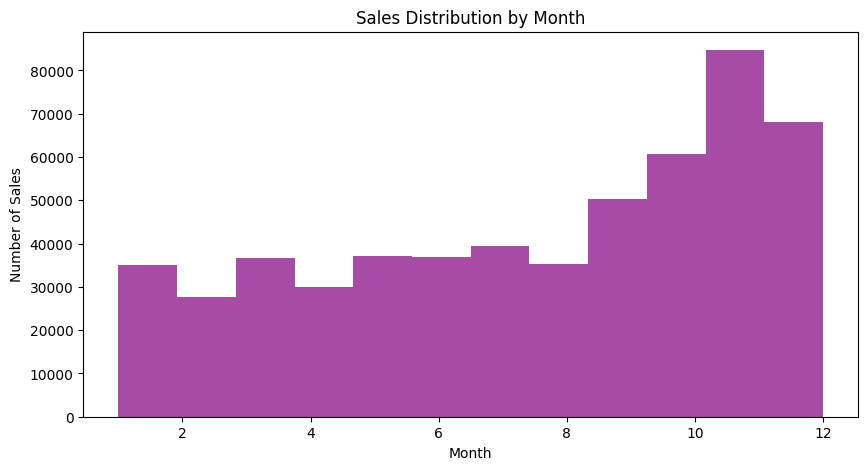

In [78]:
# Plotting Hourly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['hour'], bins=24, alpha=0.7, color='blue')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.show()

# Plotting Weekly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['weekday'], bins=7, alpha=0.7, color='green')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.show()

# Plotting Monthly Sales
plt.figure(figsize=(10, 5))
plt.hist(df['month'], bins=12, alpha=0.7, color='purple')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


In [79]:
df['total_sales'] = df['UnitPrice'] * df['Quantity']
# def time_based_multiplier(hour, weekday, month, week):
#     if month in peak_months or week in peak_weeks or weekday in peak_days:
#         if hour in peak_hours:
#             return 1.4
#         else:
#             return 1.2
#     else:
#         return 0.9

# df['price_multiplier'] = df.apply(
#     lambda x: time_based_multiplier(
#         x['InvoiceDate'].hour,
#         x['weekday'],
#         x['month'],
#         x['week']
#     ),
#     axis=1
# )
# df['adjusted_unit_price'] = df['UnitPrice'] * df['price_multiplier']

# df[['InvoiceNo', 'UnitPrice', 'adjusted_unit_price', 'price_multiplier']].head()


In [80]:
def calculate_peak_periods(data, group_by_column, top_n_percent=20):
    period_sales = data.groupby(group_by_column)['total_sales'].sum().reset_index()
    period_sales_sorted = period_sales.sort_values(by='total_sales', ascending=False)
    num_peak_periods = int((top_n_percent / 100) * len(period_sales_sorted))
    peak_periods = period_sales_sorted.head(num_peak_periods)[group_by_column].tolist()
    return peak_periods

In [81]:

peak_months = calculate_peak_periods(df, 'month')
peak_weeks = calculate_peak_periods(df, 'week')
peak_weekdays = calculate_peak_periods(df, 'weekday')
peak_hours = calculate_peak_periods(df, 'hour')

In [82]:
def assign_peak_level_combined(row):
    peak_count = sum([
        row['month'] in peak_months,
        row['week'] in peak_weeks,
        row['weekday'] in peak_weekdays,
        row['hour'] in peak_hours
    ])
    return ['Very Low', 'Low', 'Medium', 'High', 'Very High'][peak_count]


In [83]:
df['demand_intensity'] = df.apply(assign_peak_level_combined, axis=1)

In [84]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,demand_intensity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High


In [85]:
product_demand = df.groupby('StockCode')['Quantity'].sum().reset_index()
product_demand.rename(columns={'Quantity': 'total_quantity'}, inplace=True)

df = df.merge(product_demand, on='StockCode')

In [86]:
high_demand_threshold = np.percentile(product_demand['total_quantity'], 80)  # Top 20% demand
low_demand_threshold = np.percentile(product_demand['total_quantity'], 20)  # Bottom 20% demand

In [87]:
def assign_demand_level(total_quantity):
    if total_quantity > high_demand_threshold:
        return 'High'
    elif total_quantity < low_demand_threshold:
        return 'Low'
    else:
        return 'Medium'

In [88]:
product_demand['overall_demand_level'] = product_demand['total_quantity'].apply(assign_demand_level)

In [89]:
df = df.merge(product_demand[['StockCode', 'overall_demand_level']], on='StockCode')

In [90]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,demand_intensity,total_quantity,overall_demand_level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium,38830,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,1911,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium,1422,Medium
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,3589,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,4660,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High,1528,Medium
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High,2066,High
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,1690,Medium
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,1006,Medium


In [91]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [92]:
reference_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [93]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,2.08
1,12347.0,1,182,481.21
2,12348.0,74,31,178.71
3,12349.0,18,73,605.10
4,12350.0,309,17,65.30


In [94]:
rfm['RecencySegment'] = pd.qcut(rfm['Recency'], 4, labels=['High', 'Medium', 'Low', 'Very Low'])
rfm['FrequencySegment'] = pd.qcut(rfm['Frequency'], 4, labels=['Very Low', 'Low', 'Medium', 'High'])
rfm['MonetarySegment'] = pd.qcut(rfm['Monetary'], 4, labels=['Very Low', 'Low', 'Medium', 'High'])

In [95]:
df = df.merge(rfm[['CustomerID', 'RecencySegment','FrequencySegment','MonetarySegment']], on='CustomerID', how='left')

In [96]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,month,week,total_sales,demand_intensity,total_quantity,overall_demand_level,RecencySegment,FrequencySegment,MonetarySegment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,12,48,15.30,Medium,38830,High,Very Low,High,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,1911,High,Very Low,High,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,12,48,22.00,Medium,1422,Medium,Very Low,High,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,3589,High,Very Low,High,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,12,48,20.34,Medium,4660,High,Very Low,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4,12,49,10.20,High,1528,Medium,High,Medium,Medium
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4,12,49,12.60,High,2066,High,High,Medium,Medium
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,1690,Medium,High,Medium,Medium
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4,12,49,16.60,High,1006,Medium,High,Medium,Medium


In [97]:
unique_countries = df['Country'].nunique()

print(f"Number of unique country: {unique_countries}")

Number of unique country: 38


In [98]:
all_countries_stats = df.groupby('Country').agg(
    total_sales=('total_sales', 'sum'),
    total_quantity=('total_quantity', 'sum'),
    avg_unit_price=('UnitPrice', 'mean')
).reset_index()

In [99]:
all_countries_stats

,Country,total_sales,total_quantity,avg_unit_price
0,Australia,137077.270,6267246,3.220612
1,Austria,10154.320,1736315,4.243192
2,Bahrain,548.400,76285,4.556316
3,Belgium,40910.960,11201183,3.644335
4,Brazil,1143.600,144646,4.456250
5,Canada,3666.380,617512,6.030331
6,Channel Islands,20086.290,4214677,4.932124
7,Cyprus,12946.290,2029024,6.302363
8,Czech Republic,707.720,96748,2.938333
9,Denmark,18768.140,1985238,3.256941


In [100]:
countries_excluding_uk_stats = all_countries_stats[all_countries_stats['Country'] != 'United Kingdom']

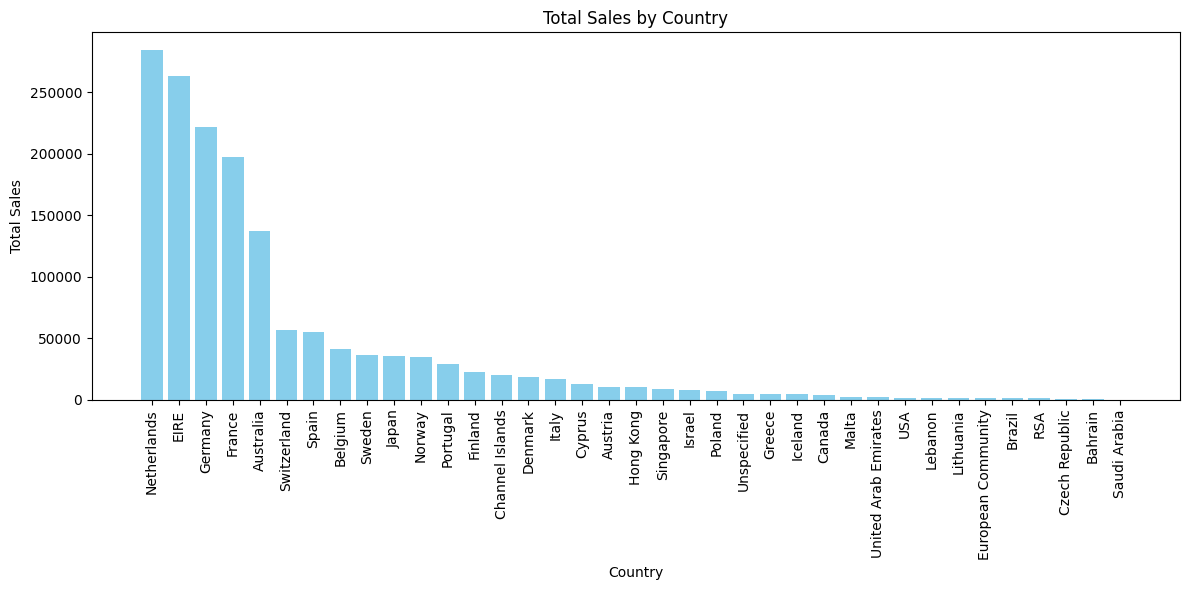

In [101]:
plt.figure(figsize=(12, 6))
country_stats_sorted = countries_excluding_uk_stats.sort_values('total_sales', ascending=False)
plt.bar(country_stats_sorted['Country'], country_stats_sorted['total_sales'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [102]:
high_demand_threshold_excluding_uk = np.percentile(countries_excluding_uk_stats['total_sales'], 80)  # Top 20% sales
low_demand_threshold_excluding_uk = np.percentile(countries_excluding_uk_stats['total_sales'], 20)  # Bottom 20% sales

In [103]:
high_demand_threshold_including_uk = np.percentile(all_countries_stats['total_sales'], 80)  # Top 20% sales
low_demand_threshold_including_uk = np.percentile(all_countries_stats['total_sales'], 20)  # Bottom 20% sales

In [104]:
low_demand_threshold_excluding_uk

np.float64(1701.288)

In [105]:
low_demand_threshold_including_uk

np.float64(1708.6960000000001)

In [106]:
high_demand_threshold_excluding_uk

np.float64(40047.950000000004)

In [107]:
low_demand_threshold_excluding_uk

np.float64(1701.288)

In [108]:
def demand_level(country, total_sales):
    high_threshold, low_threshold = (
        (high_demand_threshold_including_uk, low_demand_threshold_including_uk)
        if country == 'United Kingdom'
        else (high_demand_threshold_excluding_uk, low_demand_threshold_excluding_uk)
    )
    return 'High' if total_sales > high_threshold else 'Low' if total_sales < low_threshold else 'Medium'


In [112]:
all_countries_stats['country_purchasing_power'] = all_countries_stats.apply(
    lambda x: demand_level(x['Country'], x['total_sales']), axis=1
)

In [113]:
df = df.merge(all_countries_stats[['Country', 'country_purchasing_power']], on='Country', how='left')

In [114]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,hour,weekday,...,week,total_sales,demand_intensity,total_quantity,overall_demand_level,RecencySegment,FrequencySegment,MonetarySegment,country_wise_demand_level,country_purchasing_power
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,...,48,15.30,Medium,38830,High,Very Low,High,High,High,High
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,...,48,20.34,Medium,1911,High,Very Low,High,High,High,High
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,...,48,22.00,Medium,1422,Medium,Very Low,High,High,High,High
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,...,48,20.34,Medium,3589,High,Very Low,High,High,High,High
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,...,48,20.34,Medium,4660,High,Very Low,High,High,High,High


In [115]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data
# Step 1: Group by StockCode and Country
grouped_data = df.groupby(['StockCode', 'Country'])

# Step 2: Aggregate sales (quantity * unit price)
grouped_sales = grouped_data['Quantity'].sum() * grouped_data['UnitPrice'].sum()

# Step 3: Reset index and calculate total sales per product per country
order_intensity = grouped_sales.reset_index(name='total_sales')

# Display the resulting order intensity for each product per country
print(order_intensity)


          StockCode         Country  total_sales
0             10002            EIRE        10.20
1             10002          France      2529.60
2             10002         Germany         0.85
3             10002           Japan         0.85
4             10002           Spain        20.40
...             ...             ...          ...
19834  gift_0001_20  United Kingdom      3007.60
19835  gift_0001_30  United Kingdom      6494.61
19836  gift_0001_40  United Kingdom       302.10
19837  gift_0001_50  United Kingdom       670.24
19838             m  United Kingdom         2.55

[19839 rows x 3 columns]
